# Week 4 Exercise with Numpy

Use only numpy (not pandas) in these exercises
#### Exercise 1
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015
4. Make a bar plot to show the size of each city area from the smallest to the largest
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk)
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015


## Assignment
Here is the text for the assignment linked to

## Status
Solution Part 1 igang,
    nået til opgave 7
   

## Solution part 1

In [1]:
import numpy as np
import csv
%matplotlib notebook
import matplotlib.pyplot as plt
file = '../data/befkbhalderstatkode.csv'

In [2]:
# 1+2
data = np.genfromtxt(file, delimiter=',', dtype=np.uint, skip_header=1)
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}
print(data)

[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [1992   99   89 5100    1]
 [1992   99   90 5180    1]
 [1992   99   93 5100    1]]


In [3]:
# 3
beboere = {}
for x in neighb:
    mask = ((data[:,0] == 2015) & (data[:,1] == x))
    maskSum =(data[mask][0:,4].sum())
    beboere[neighb[x]] = maskSum
beboere    


{'Indre By': 51937,
 'Østerbro': 75113,
 'Nørrebro': 78802,
 'Vesterbro/Kgs. Enghave': 61623,
 'Valby': 51727,
 'Vanløse': 39537,
 'Brønshøj-Husum': 43908,
 'Bispebjerg': 53604,
 'Amager Øst': 55205,
 'Amager Vest': 64967,
 'Udenfor': 3872}

In [4]:
# 4
sorted_tuples = sorted(beboere.items(), key=lambda item: item[1])
beboere_sorted = {}

for x,y in sorted_tuples:
    beboere_sorted[x] = y


<IPython.core.display.Javascript object>


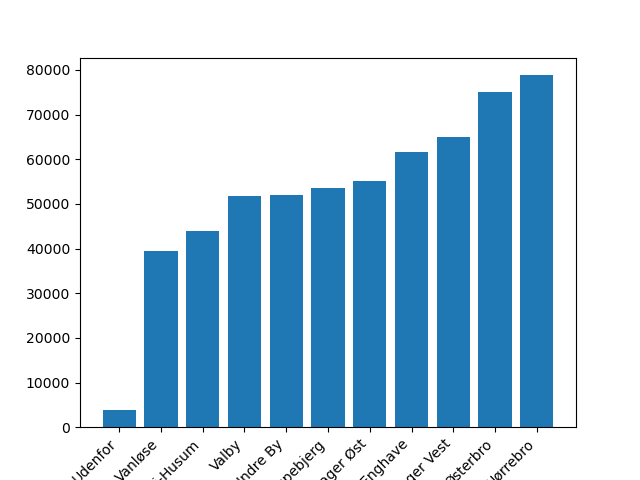

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

In [22]:
plt.bar(list(beboere_sorted), list(beboere_sorted.values()), align='center')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')


In [6]:
# 5
mask = ((data[:,0] == 2015) & (data[:,2] > 65))
old_people = (data[mask][0:,4].sum())

print("Beboere over 65 år: ",old_people)

Beboere over 65 år:  55750


In [7]:
# 6
country_codes = {"0": "Uoplyst (1)", "5001": "Uoplyst (2)", "5100": "Danmark", "5101": "Gr\u00f8nland", "5102": "Udlandet uoplyst", "5103": "Statsl\u00f8s", "5104": "Finland", "5105": "Island, ligeret dansk", "5106": "Island", "5107": "Liechtenstein", "5108": "Luxembourg", "5109": "Monaco", "5110": "Norge", "5114": "Europa uoplyst", "5115": "Kongelig", "5120": "Sverige", "5122": "Albanien", "5124": "Andorra", "5126": "Belgien", "5128": "Bulgarien", "5129": "Tjekkoslovakiet", "5130": "Frankrig", "5134": "Gr\u00e6kenland", "5140": "Nederlandene", "5142": "Irland", "5150": "Italien", "5151": "Serbien og Montenegro", "5152": "Jugoslavien", "5153": "Malta", "5154": "Polen", "5156": "Portugal", "5158": "Rum\u00e6nien", "5159": "San Marino", "5160": "Schweiz", "5162": "Sovjetunionen", "5164": "Spanien", "5170": "Storbritannien", "5172": "Tyrkiet", "5174": "Ungarn", "5176": "Vatikanstaten", "5180": "Tyskland", "5182": "\u00d8strig", "5199": "Europa uoplyst", "5202": "Algeriet", "5204": "Angola", "5207": "Botswana", "5213": "Burundi", "5214": "Etiopien", "5215": "Comorerne", "5216": "Eritrea", "5222": "Gambia", "5228": "Ghana", "5230": "\u00c6kvatorialguinea", "5231": "Guinea-Bissau", "5232": "Guinea", "5233": "Kap Verde", "5234": "Kenya", "5235": "Lesotho", "5236": "Liberia", "5238": "Libyen", "5240": "Mozambique", "5242": "Madagaskar", "5243": "Mali", "5244": "Marokko", "5245": "Mauritius", "5246": "Nigeria", "5247": "Namibia", "5248": "Marshall\u00f8erne", "5255": "Sierra Leone", "5258": "Sudan", "5259": "Swaziland", "5260": "Sydsudan", "5262": "Sydafrika", "5266": "Tanzania", "5268": "Tunesien", "5269": "Uganda", "5272": "Egypten", "5273": "Tuvalu", "5274": "Kiribati", "5275": "Vanuatu", "5276": "Centralafrikanske Republik", "5277": "Cameroun", "5278": "Congo, Demokratiske Republik", "5279": "Congo, Republikken", "5281": "Benin", "5282": "Elfenbenskysten", "5283": "Gabon", "5284": "Mauretanien", "5285": "Niger", "5287": "Rwanda", "5288": "Senegal", "5289": "Somalia", "5292": "Tchad", "5293": "Togo", "5294": "Burkina Faso", "5295": "Zimbabwe", "5296": "Zambia", "5297": "Malawi", "5298": "Seychellerne", "5299": "Afrika uoplyst", "5302": "Argentina", "5303": "Bahamas", "5304": "Bolivia", "5305": "Barbados", "5306": "Brasilien", "5308": "Guyana", "5309": "Antigua og Barbuda", "5310": "Nauru", "5311": "Skt. Vincent og Grenadinerne", "5314": "Canada", "5316": "Chile", "5318": "Colombia", "5319": "Syd- og Mellemamerika uoplyst", "5322": "Costa Rica", "5324": "Cuba", "5326": "Dominikanske Republik", "5328": "Ecuador", "5338": "Guatemala", "5339": "Grenada", "5342": "Haiti", "5344": "Surinam", "5345": "Dominica", "5347": "Skt. Lucia", "5348": "Honduras", "5352": "Jamaica", "5354": "Mexico", "5356": "Nicaragua", "5358": "Panama", "5364": "Paraguay", "5366": "Peru", "5372": "El Salvador", "5374": "Trinidad og Tobago", "5376": "Uruguay", "5390": "USA", "5392": "Venezuela", "5395": "Vestindiske \u00d8er", "5397": "Nordamerika uoplyst", "5398": "Syd- og Mellemamerika uoplyst", "5402": "Yemen", "5403": "Forenede Arabiske Emirater", "5404": "Afghanistan", "5406": "Bahrain", "5408": "Bhutan", "5410": "Bangladesh", "5412": "Brunei", "5414": "Myanmar", "5416": "Cambodja", "5418": "Sri Lanka", "5422": "Cypern", "5424": "Taiwan", "5432": "Indien", "5434": "Indonesien", "5435": "\u00d8sttimor", "5436": "Irak", "5438": "Iran", "5442": "Israel", "5444": "Japan", "5446": "Jordan", "5448": "Kina", "5452": "Kuwait", "5454": "Laos", "5456": "Libanon", "5457": "Maldiverne", "5458": "Malaysia", "5459": "Mongoliet", "5462": "Oman", "5464": "Nepal", "5466": "Nordkorea", "5468": "Vietnam (1)", "5471": "Asien uoplyst", "5472": "Pakistan", "5474": "Filippinerne", "5478": "Saudi-Arabien", "5482": "Singapore", "5484": "Sydkorea", "5486": "Syrien", "5487": "Mellem\u00f8sten uoplyst", "5488": "Vietnam (2)", "5492": "Thailand", "5496": "Qatar", "5499": "Asien uoplyst", "5502": "Australien", "5505": "Tonga", "5508": "Fiji", "5514": "New Zealand", "5522": "Samoa", "5525": "Djibouti", "5526": "Belize", "5534": "Papua Ny Guinea", "5599": "\u00d8er i Stillehavet", "5607": "Estland", "5609": "Letland", "5611": "Litauen", "5621": "Sao Tome og Principe", "5623": "Salomon\u00f8erne", "5625": "Skt. Kitts og Nevis", "5700": "Rusland", "5704": "Ukraine", "5706": "Hviderusland", "5708": "Armenien", "5710": "Aserbajdsjan", "5712": "Moldova", "5714": "Usbekistan", "5716": "Kasakhstan", "5718": "Turkmenistan", "5720": "Kirgisistan", "5722": "Tadsjikistan", "5724": "Georgien", "5750": "Kroatien", "5752": "Slovenien", "5754": "Bosnien-Hercegovina", "5756": "Makedonien", "5757": "Serbien", "5758": "Jugoslavien, Forbundsrepublikken", "5759": "Montenegro", "5761": "Kosovo", "5776": "Tjekkiet", "5778": "Slovakiet", "5779": "Cook\u00f8erne", "5800": "Land ukendt (2)", "5901": "F\u00e6r\u00f8erne uoplyst", "5902": "F\u00e6r\u00f8erne", "5999": "Land ukendt (1)"}
nordic_countries = ["Norge","Sverige","Finland","Island","Grønland"]
old_nords = 0

for x,y in country_codes.items():
    if y in nordic_countries:
        print(x)
        mask = ((data[:,0] == 2015) & (data[:,2] > 65) & (data[:,3] == x))
        old_nords += (data[mask][0:,4].sum())
       
        
print("Nordiske beboere over 65 år: ",old_nords)

5101
5104
5106
5110
5120
Nordiske beboere over 65 år:  0.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':


In [8]:
# 7 Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015
#mask = (data[])

In [21]:
import sys

def getPopulation(n1,n2,city):
    for x in neighb:
        if neighb[x] == city:
            city = x
    mask = ((data[:,0] >= n1) & (data[:,0] <= n2) & (data[:,1] == city))
    return data[mask]

In [20]:
getPopulation(1992,2015,"Valby")

array([[2015,    5,    0, 5100,  696],
       [2015,    5,    0, 5103,    1],
       [2015,    5,    0, 5104,    1],
       ...,
       [1992,    5,  100, 5100,    2],
       [1992,    5,  101, 5100,    1],
       [1992,    5,  102, 5100,    1]], dtype=uint64)

## Solution part 2